### Import Dependencies & Setup

In [9]:
import shap
import pandas as pd
import numpy as np
shap.initjs()
ignore_warnings=True

### Import & Display Datasets

In [29]:
dol_wh_data = pd.read_csv("Resources/final_dol_output_file.csv")
dol_wh_data

,W_Process_Improvements,W_Accomplishment,W_Expectations,W_Talent_Use,W_Goal_Knowledge,S_Support_Development,S_Actively_Listens,S_Treats_Respect,S_Trust_Confidence,S_Performance,...,DFEDTEN_B,DFEDTEN_C,DSEX_A,DSEX_B,DMIL_A,DMIL_B,DRNO_A,DRNO_B,DRNO_C,DRNO_D
0,3.0,5.0,5.0,4.0,5.0,3.0,4.0,3.0,3.0,2.0,...,1,0,1,0,0,1,0,1,0,0
1,2.0,5.0,4.0,2.0,5.0,1.0,1.0,2.0,1.0,2.0,...,1,0,0,1,0,1,0,1,0,0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,0,1,0,1,0,0,1,0,0
3,1.0,2.0,4.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,...,0,0,0,1,1,0,0,1,0,0
4,4.0,3.0,4.0,3.0,3.0,4.0,3.0,5.0,5.0,5.0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7545,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,0,0,1,0,0,1,1,0,0,0
7546,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,2.0,...,0,0,0,1,0,1,0,0,1,0
7547,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,...,0,0,0,1,0,1,0,0,1,0
7548,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,0,0,0,1,0,1,0,1,0,0


In [26]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

target = "Leaving_Y_N"
X = dol_wh_data.drop(columns = [target], axis=1) #Independent variables
y = dol_wh_data[target] #Dependent Variable

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       609
           1       0.43      0.65      0.51       146

    accuracy                           0.76       755
   macro avg       0.67      0.72      0.68       755
weighted avg       0.81      0.76      0.78       755



### Setup Shap Explainer

In [19]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

### Display Summary Plot

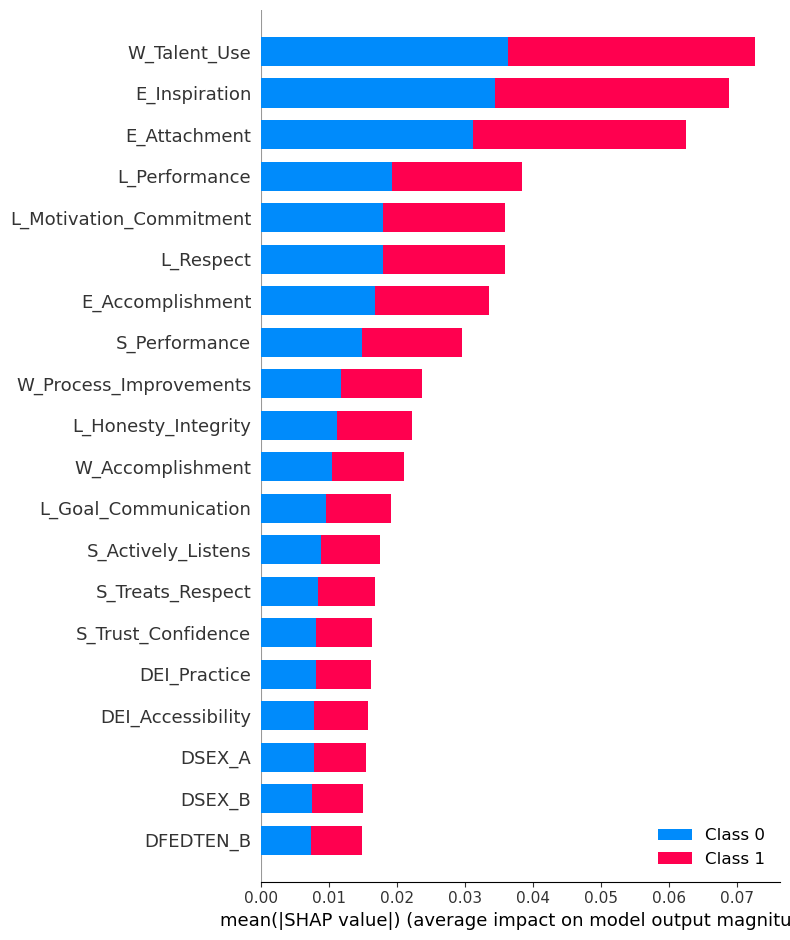

In [20]:
shap.summary_plot(shap_values, X_test)

### Display Summary Plot of "0"

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


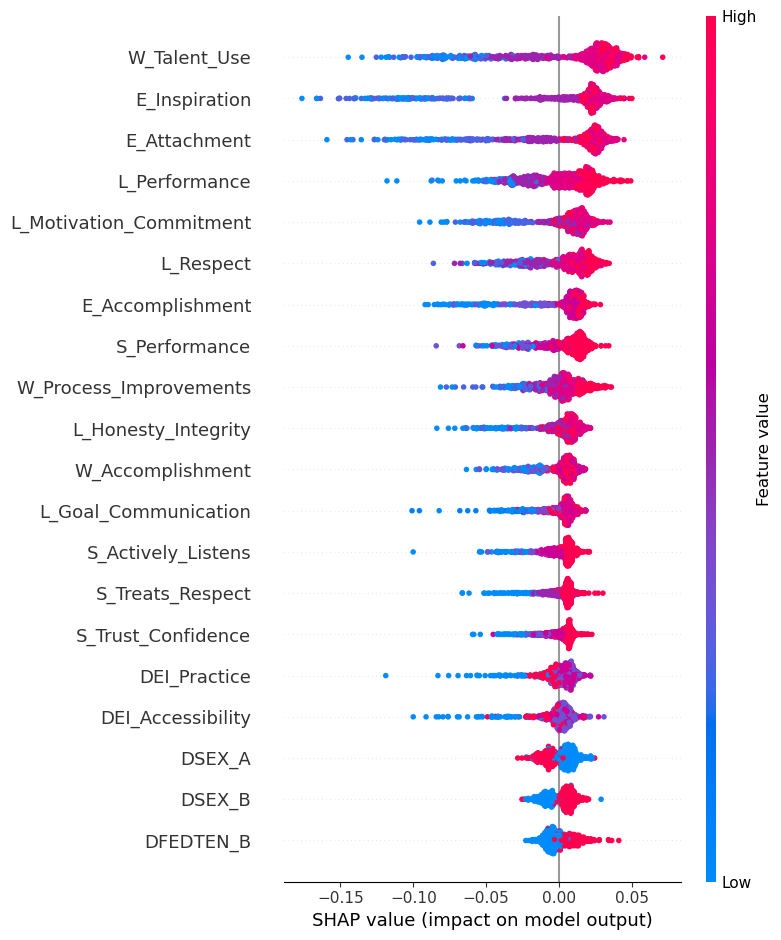

In [21]:
shap.summary_plot(shap_values[0], X_test)

### Display Dependence Plot

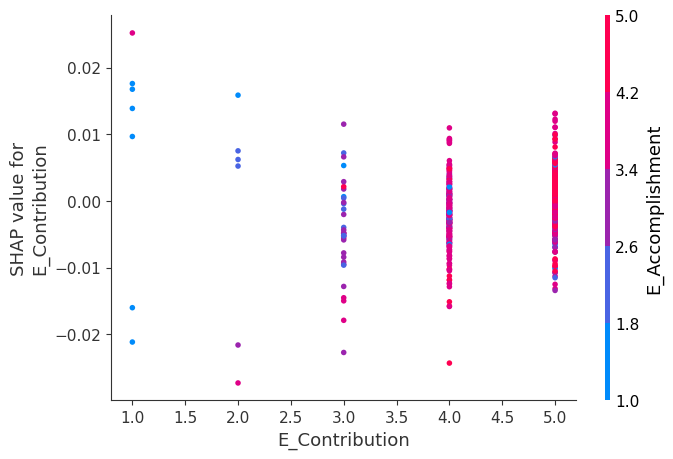

In [34]:
shap.dependence_plot("E_Contribution", shap_values[0], X_test,interaction_index="E_Accomplishment")

### Display Force Plot

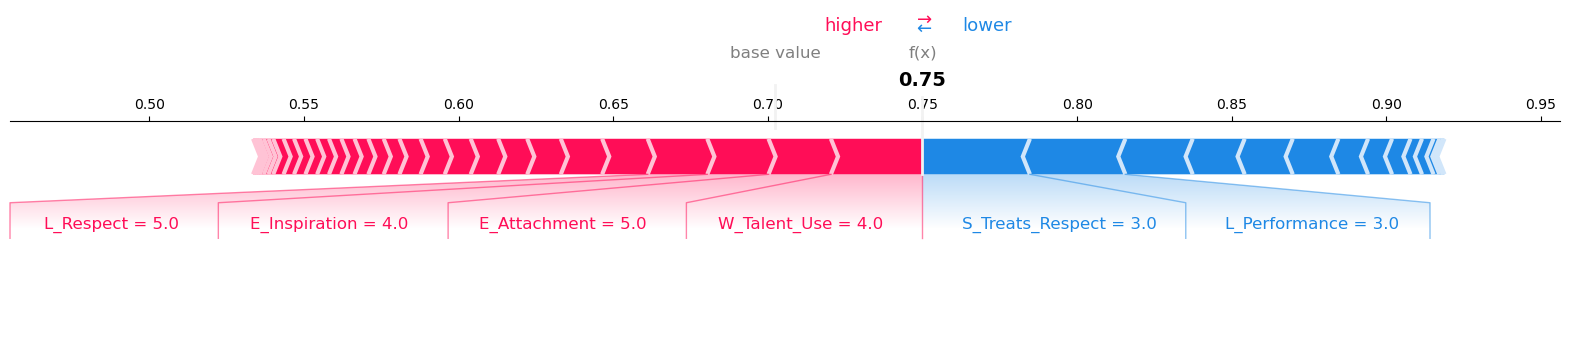

In [23]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

### Display the Decision Plot

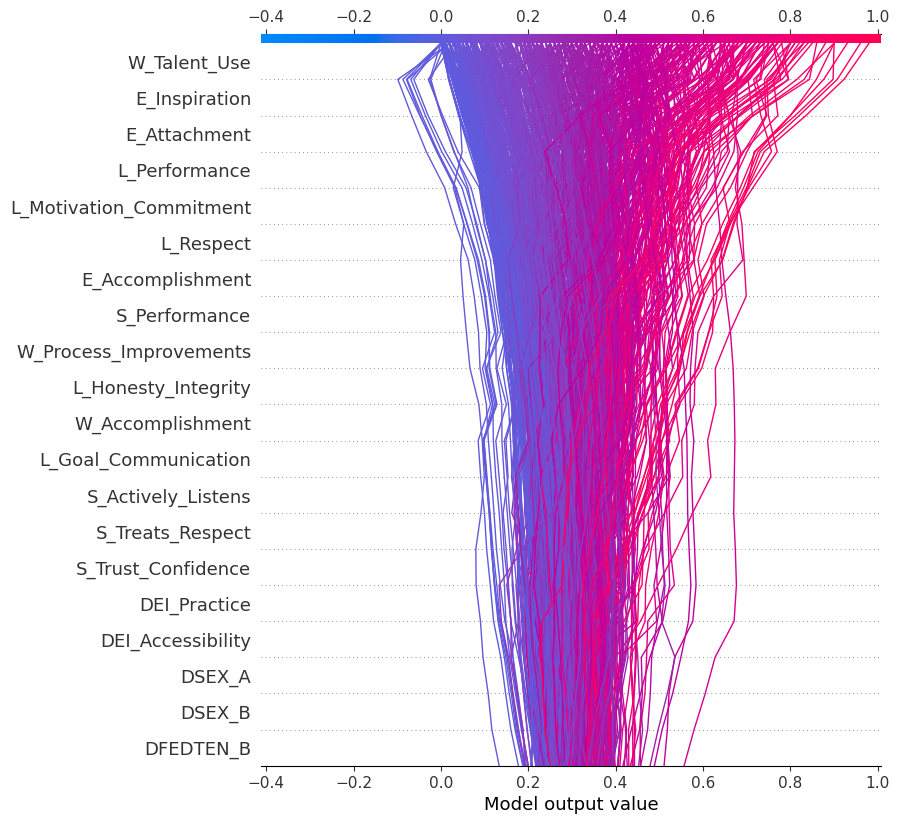

In [24]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.columns)